<a href="https://colab.research.google.com/github/maleklachheb/Prediction-of-Product-Sales/blob/main/sale_predictionv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science sales_predictions_2023

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dojo/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df2= df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

How many rows/columns:

In [6]:
df.shape

(8523, 12)

 - There are 607 rows and 12 columns

Checking the data types:

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [13]:
df.fillna('Missing Data',inplace=True)
df.isna().sum() / len(df) * 100


Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [14]:
x=df['Item_Weight'].min()
y=df['Item_Weight'].max()
z=df['Item_Weight'].mean()
print('min item weight',x)
print('max item weight',y)
print('average item weight',z)

TypeError: '<=' not supported between instances of 'float' and 'str'

In [15]:
x=df['Item_MRP'].min()
y=df['Item_MRP'].max()
z=df['Item_MRP'].mean()
print('min item MRP',x)
print('max item MRP',y)
print('average item MRP',z)

min item MRP 31.29
max item MRP 266.8884
average item MRP 140.9927819781767


In [16]:
print(df.value_counts())
print("------------------ \n")


Item_Identifier  Item_Weight   Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size   Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.6          LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small         Tier 2                Supermarket Type1  992.7078             1
FDV28            16.1          Regular           0.000000         Frozen Foods           35.1558   OUT017             2007                       Missing Data  Tier 2                Supermarket Type1  339.5580             1
FDV32            7.785         Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Missing Data  Tier 2                Supermarket Type1  1328.2710            1
                                                 0.089070         Fruits and Vegetables  62.7510   OUT018        

In [ ]:
df['Item_Fat_Content'].replace("LF","Low Fat", inplace=True)
df['Item_Fat_Content'].replace("low fat","Low Fat", inplace=True)
df['Item_Fat_Content'].replace("reg","Regular", inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 865.6+ KB


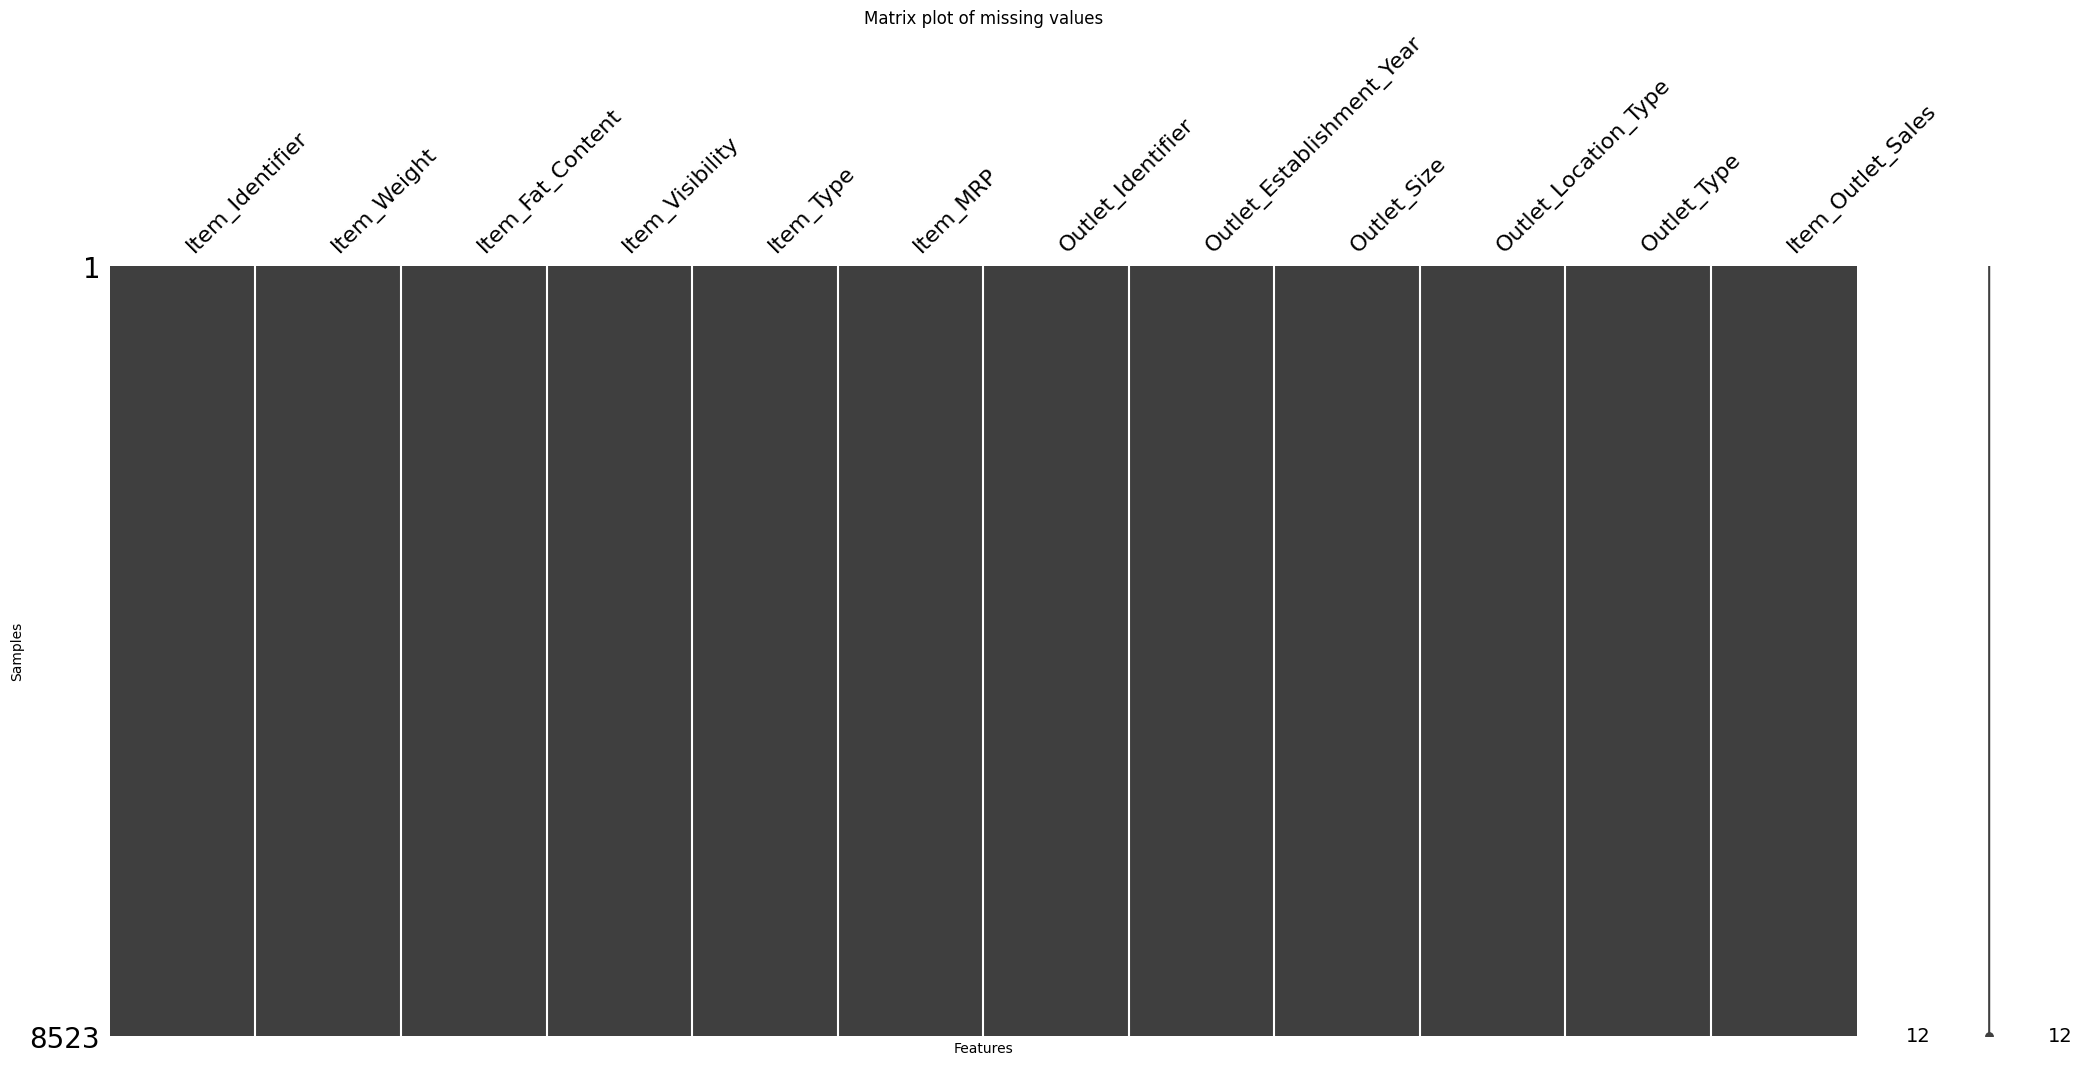

In [17]:
df.info()
from missingno import matrix
matrix(df)

# Adding the aesthetics
plt.title('Matrix plot of missing values')
plt.xlabel('Features')
plt.ylabel('Samples')

# Show the plot
plt.show()

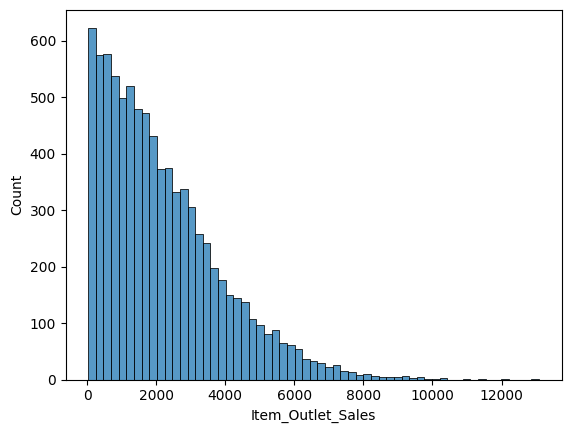

In [21]:

 ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')

In [28]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()


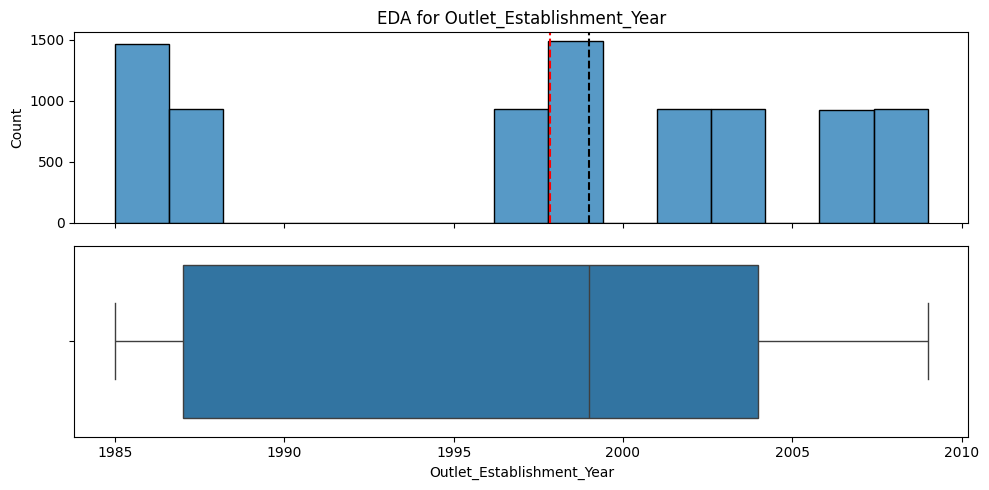

In [29]:
plot_numeric(df,'Outlet_Establishment_Year')

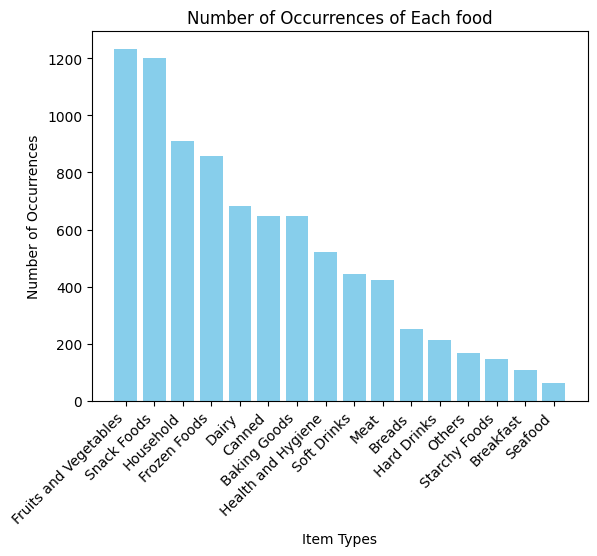

In [32]:
counts = df['Item_Type'].value_counts()

# Extract item types and corresponding counts
item_types = counts.index
occurrences = counts.values

# Create a bar chart
plt.bar(item_types, occurrences, color='skyblue')
plt.xlabel('food type')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each food')
plt.xticks(rotation=45, ha='right')
plt.show()

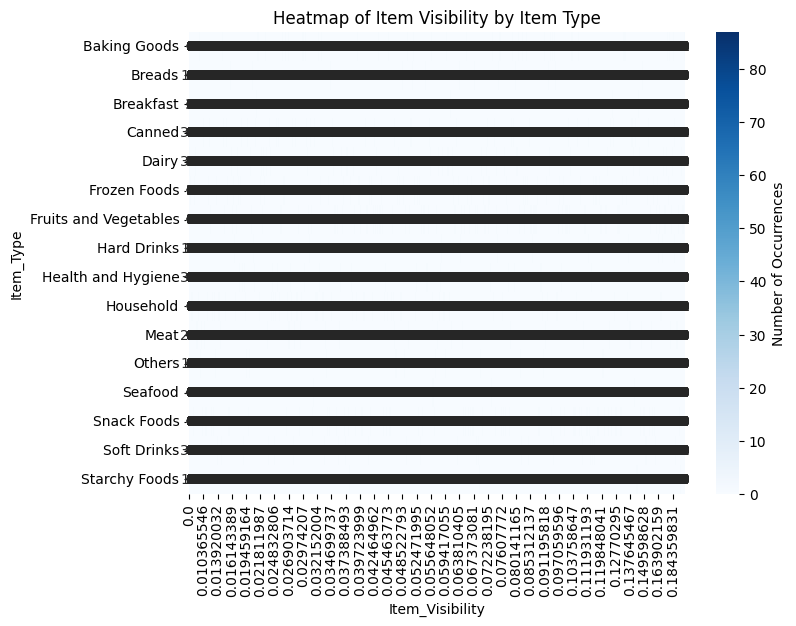

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.pivot_table(index='Item_Type', columns='Item_Visibility', aggfunc='size').fillna(0),
            annot=True, cmap='Blues', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Heatmap of Item Visibility by Item Type')
plt.show()

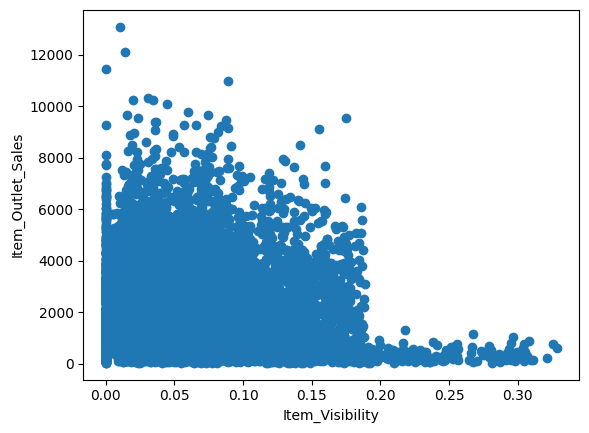

In [38]:
fig, ax = plt.subplots()
ax.scatter(df['Item_Visibility'], df['Item_Outlet_Sales']);
ax.set(xlabel='Item_Visibility', ylabel="Item_Outlet_Sales");